In [50]:
"""
Q-Learning example using OpenAI gym MountainCar enviornment
Author: Moustafa Alzantot (malzantot@ucla.edu)
Citation: https://medium.com/@m.alzantot/deep-reinforcement-learning-demysitifed-episode-2-policy-iteration-value-iteration-and-q-978f9e89ddaa
"""
import numpy as np
import matplotlib.pyplot as plt
import gym
from gym import wrappers

n_states = 20
iter_max = 100000

initial_lr = 1.0 # Learning rate
min_lr = 0.003
gamma = 1.0
t_max = 100000
eps = 0.02

def run_episode(env, policy=None, render=False):
    obs = env.reset()
    total_reward = 0
    step_idx = 0
    for _ in range(t_max):
        if render:
            env.render()
        if policy is None:
            action = env.action_space.sample()
        else:
            a,b = obs_to_state(env, obs)
            action = policy[a][b]
        obs, reward, done, _ = env.step(action)
        total_reward += gamma ** step_idx * reward
        step_idx += 1
        if done:
            break
    return total_reward

def obs_to_state(env, obs):
    """ Maps an observation to state """
    env_low = env.observation_space.low
    env_high = env.observation_space.high
    env_dx = (env_high - env_low) / n_states
    a = int((obs[0] - env_low[0])/env_dx[0])
    b = int((obs[1] - env_low[1])/env_dx[1])
    return a, b

In [51]:
env_name = 'MountainCar-v0'
env = gym.make(env_name)
env.seed(0)
np.random.seed(0)
print ('----- using Q Learning -----')
q_table = np.zeros((n_states, n_states, 3))
for i in range(iter_max):
    obs = env.reset()
    total_reward = 0
    ## eta: learning rate is decreased at each step
    eta = max(min_lr, initial_lr * (0.85 ** (i//100)))
    for j in range(t_max):
        a, b = obs_to_state(env, obs)
        if np.random.uniform(0, 1) < eps:
            action = np.random.choice(env.action_space.n)
        else:
            logits = q_table[a][b]
            logits_exp = np.exp(logits)
            probs = logits_exp / np.sum(logits_exp)
            action = np.random.choice(env.action_space.n, p=probs)
        obs, reward, done, _ = env.step(action)
        total_reward += (gamma ** j) * reward
        # update q table
        a_, b_ = obs_to_state(env, obs)
        q_table[a][b][action] = q_table[a][b][action] + eta * (reward + gamma *  np.max(q_table[a_][b_]) - q_table[a][b][action])
        if done:
            break
    if i % 100 == 0:
        print('Iteration #%d -- Total reward = %d.' %(i+1, total_reward))
solution_policy = np.argmax(q_table, axis=2)
solution_policy_scores = [run_episode(env, solution_policy, False) for _ in range(100)]
print("Average score of solution = ", np.mean(solution_policy_scores))
# Animate it
run_episode(env, solution_policy, True)

----- using Q Learning -----
Iteration #1 -- Total reward = -200.
Iteration #101 -- Total reward = -200.
Iteration #201 -- Total reward = -200.
Iteration #301 -- Total reward = -200.
Iteration #401 -- Total reward = -200.
Iteration #501 -- Total reward = -200.
Iteration #601 -- Total reward = -200.
Iteration #701 -- Total reward = -200.
Iteration #801 -- Total reward = -200.
Iteration #901 -- Total reward = -200.
Iteration #1001 -- Total reward = -200.
Iteration #1101 -- Total reward = -200.
Iteration #1201 -- Total reward = -200.
Iteration #1301 -- Total reward = -176.
Iteration #1401 -- Total reward = -200.
Iteration #1501 -- Total reward = -200.
Iteration #1601 -- Total reward = -200.
Iteration #1701 -- Total reward = -174.
Iteration #1801 -- Total reward = -152.
Iteration #1901 -- Total reward = -151.
Iteration #2001 -- Total reward = -159.
Iteration #2101 -- Total reward = -193.
Iteration #2201 -- Total reward = -200.
Iteration #2301 -- Total reward = -131.
Iteration #2401 -- Tota

Iteration #20201 -- Total reward = -125.
Iteration #20301 -- Total reward = -146.
Iteration #20401 -- Total reward = -149.
Iteration #20501 -- Total reward = -122.
Iteration #20601 -- Total reward = -200.
Iteration #20701 -- Total reward = -200.
Iteration #20801 -- Total reward = -171.
Iteration #20901 -- Total reward = -200.
Iteration #21001 -- Total reward = -136.
Iteration #21101 -- Total reward = -200.
Iteration #21201 -- Total reward = -200.
Iteration #21301 -- Total reward = -200.
Iteration #21401 -- Total reward = -200.
Iteration #21501 -- Total reward = -200.
Iteration #21601 -- Total reward = -200.
Iteration #21701 -- Total reward = -200.
Iteration #21801 -- Total reward = -200.
Iteration #21901 -- Total reward = -200.
Iteration #22001 -- Total reward = -200.
Iteration #22101 -- Total reward = -200.
Iteration #22201 -- Total reward = -200.
Iteration #22301 -- Total reward = -200.
Iteration #22401 -- Total reward = -187.
Iteration #22501 -- Total reward = -200.
Iteration #22601

Iteration #40201 -- Total reward = -200.
Iteration #40301 -- Total reward = -199.
Iteration #40401 -- Total reward = -200.
Iteration #40501 -- Total reward = -200.
Iteration #40601 -- Total reward = -165.
Iteration #40701 -- Total reward = -186.
Iteration #40801 -- Total reward = -200.
Iteration #40901 -- Total reward = -200.
Iteration #41001 -- Total reward = -171.
Iteration #41101 -- Total reward = -200.
Iteration #41201 -- Total reward = -193.
Iteration #41301 -- Total reward = -161.
Iteration #41401 -- Total reward = -200.
Iteration #41501 -- Total reward = -200.
Iteration #41601 -- Total reward = -168.
Iteration #41701 -- Total reward = -163.
Iteration #41801 -- Total reward = -199.
Iteration #41901 -- Total reward = -192.
Iteration #42001 -- Total reward = -200.
Iteration #42101 -- Total reward = -200.
Iteration #42201 -- Total reward = -200.
Iteration #42301 -- Total reward = -196.
Iteration #42401 -- Total reward = -164.
Iteration #42501 -- Total reward = -165.
Iteration #42601

Iteration #60201 -- Total reward = -176.
Iteration #60301 -- Total reward = -200.
Iteration #60401 -- Total reward = -200.
Iteration #60501 -- Total reward = -200.
Iteration #60601 -- Total reward = -200.
Iteration #60701 -- Total reward = -200.
Iteration #60801 -- Total reward = -200.
Iteration #60901 -- Total reward = -200.
Iteration #61001 -- Total reward = -200.
Iteration #61101 -- Total reward = -200.
Iteration #61201 -- Total reward = -200.
Iteration #61301 -- Total reward = -200.
Iteration #61401 -- Total reward = -200.
Iteration #61501 -- Total reward = -200.
Iteration #61601 -- Total reward = -200.
Iteration #61701 -- Total reward = -200.
Iteration #61801 -- Total reward = -200.
Iteration #61901 -- Total reward = -200.
Iteration #62001 -- Total reward = -200.
Iteration #62101 -- Total reward = -200.
Iteration #62201 -- Total reward = -200.
Iteration #62301 -- Total reward = -188.
Iteration #62401 -- Total reward = -169.
Iteration #62501 -- Total reward = -200.
Iteration #62601

Iteration #80201 -- Total reward = -200.
Iteration #80301 -- Total reward = -191.
Iteration #80401 -- Total reward = -169.
Iteration #80501 -- Total reward = -174.
Iteration #80601 -- Total reward = -200.
Iteration #80701 -- Total reward = -165.
Iteration #80801 -- Total reward = -166.
Iteration #80901 -- Total reward = -200.
Iteration #81001 -- Total reward = -162.
Iteration #81101 -- Total reward = -200.
Iteration #81201 -- Total reward = -164.
Iteration #81301 -- Total reward = -198.
Iteration #81401 -- Total reward = -176.
Iteration #81501 -- Total reward = -167.
Iteration #81601 -- Total reward = -178.
Iteration #81701 -- Total reward = -200.
Iteration #81801 -- Total reward = -200.
Iteration #81901 -- Total reward = -200.
Iteration #82001 -- Total reward = -200.
Iteration #82101 -- Total reward = -200.
Iteration #82201 -- Total reward = -200.
Iteration #82301 -- Total reward = -189.
Iteration #82401 -- Total reward = -200.
Iteration #82501 -- Total reward = -200.
Iteration #82601

-173.0

In [68]:
import time
start = time.time()
solution_policy = np.argmax(q_table, axis=2)
solution_policy_scores = [run_episode(env, solution_policy, False) for _ in range(100)]
print("Time: " + str((time.time() - start)))
print("Average score of solution = ", np.mean(solution_policy_scores))
# Animate it
run_episode(env, solution_policy, True)

Time: 0.7480647563934326
Average score of solution =  -139.07


-150.0

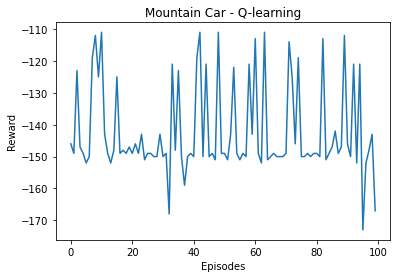

In [63]:
plt.plot(solution_policy_scores)
plt.xlabel("Episodes")
plt.ylabel("Reward")
plt.title("Mountain Car - Q-learning")
plt.show()

In [2]:
# https://stats.stackexchange.com/questions/221402/understanding-the-role-of-the-discount-factor-in-reinforcement-learning#:~:text=The%20discount%20factor%20essentially%20determines,that%20produce%20an%20immediate%20reward.